# CZ2001 Algorithms - Group SS2, Team 4
## Example Class 4 Source Code (in Python)

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
import math

In [2]:
# Graphs are created using Python's default dictionary.

from collections import defaultdict
graph = defaultdict(list)

# Define the function to add edges to the graph:
def addEdge(graph, u, v):
    graph[u].append(v)

In [3]:
# We created the following list of 40 random cities (including Singapore as it is a city-nation): 

city_list = ["Singapore", "Bombay", "Kuala Lumpur", "Jakarta", "Bangkok", "Beijing", "Shanghai", "Seoul",\
             "Hong Kong", "Tokyo", "Sydney", "Perth", "New Zealand", "Washington D.C.", "New York", "Los Angeles",\
             "Chicago", "Seattle", "Boston", "London", "Amsterdam", "Berlin", "Copenhagen", "Moscow",\
             "Paris","Rome", "Toronto", "Cairo", "Istanbul", "Dubai", "Madrid", "Las Vegas",\
             "Prague", "Budapest", "Munich", "Zurich", "Vancouver", "Melbourne", "Rio De Janeiro", "Frankfurt"]

In [4]:
# The CreateGraph function creates a graph where non-stop flights (edges) are created between random cities (vertices):
# The new city list contains the first 'n' cities from our full list of cities, n = no. of cities specified by user.

def CreateGraph(graph, num_vertices, num_edges):
    G = nx.Graph()
    x = 0
    # req_num_edges = math.floor(n * (n - 1) * 0.25)
    while x <= num_edges:
        city_list1 = city_list[ : num_vertices]
        u = random.choice(city_list1)
        v = random.choice(city_list1)
        G.add_node(u)
        G.add_node(v)
        
        while(v == u):
            v = random.choice(city_list1)
        
        if v not in graph[u]:
            addEdge(graph, u, v)
            G.add_edge(u, v)

        if u not in graph[v]:
            addEdge(graph, v, u)
            G.add_edge(v, u)

        x += 1
    
    print("Nodes of graph: ")
    print(G.nodes())
    print("Edges of graph: ")
    print(G.edges())
    nx.draw(G)
    plt.savefig("simple_path.png") # save as png
    plt.show()

In [5]:
# The following is the function for the BFS algorithm:

def BFS(graph, source, destination):
    marked_vertices = []    # Array of all marked vertices
    queue = [[source]]      # Put source vertex into an empty Queue

    if source == destination:
        print("Source is same as Destination")
        return

    while queue:                # Loops while the Queue is not Empty
        path = queue.pop(0)     
        vertex = path[-1]  
        if vertex not in marked_vertices:
            neighbours = graph[vertex]    # For an unmarked vertex, the neighbouring vertices are now traversed through
            for neighbour_vertex in neighbours:
                new_path = list(path)
                new_path.append(neighbour_vertex)
                queue.append(new_path)
                if neighbour_vertex == destination:
                    return new_path       # This is the final path that is returned

            # The vertex is now added (appended) to the array of marked vertices
            marked_vertices.append(vertex)

    
    return "Error: Path does not exist for chosen source and destination."

The length of our complete city list is:  40
Enter the number of cities you want to add to the graph (max 40): 40
Enter the number of flights you want to add: 100

List of Cities:
1 Singapore
2 Bombay
3 Kuala Lumpur
4 Jakarta
5 Bangkok
6 Beijing
7 Shanghai
8 Seoul
9 Hong Kong
10 Tokyo
11 Sydney
12 Perth
13 New Zealand
14 Washington D.C.
15 New York
16 Los Angeles
17 Chicago
18 Seattle
19 Boston
20 London
21 Amsterdam
22 Berlin
23 Copenhagen
24 Moscow
25 Paris
26 Rome
27 Toronto
28 Cairo
29 Istanbul
30 Dubai
31 Madrid
32 Las Vegas
33 Prague
34 Budapest
35 Munich
36 Zurich
37 Vancouver
38 Melbourne
39 Rio De Janeiro
40 Frankfurt
Nodes of graph: 
['Chicago', 'Munich', 'New York', 'Vancouver', 'Bangkok', 'Zurich', 'Toronto', 'Boston', 'Budapest', 'Washington D.C.', 'Bombay', 'Seoul', 'Los Angeles', 'Frankfurt', 'Melbourne', 'Hong Kong', 'Perth', 'Singapore', 'Rio De Janeiro', 'London', 'Paris', 'New Zealand', 'Las Vegas', 'Moscow', 'Prague', 'Kuala Lumpur', 'Jakarta', 'Seattle', 'Rome', 'S

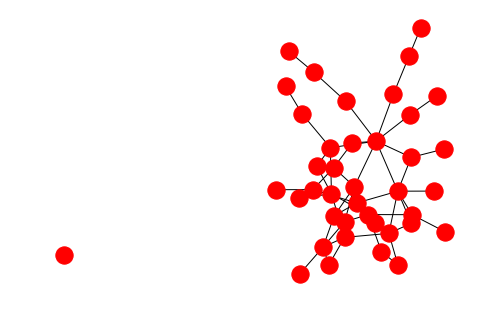

Which city do you want to select as source?
Cairo

Which city do you want to select as destination?
Frankfurt

Shortest path:  ['Cairo', 'Chicago', 'Frankfurt']

CPU Time:  0.2789497375488281  milliseconds


In [16]:
print("The length of our complete city list is: ", len(city_list))
num_cities = int(input("Enter the number of cities you want to add to the graph (max 40): "))
num_flights = int(input("Enter the number of flights you want to add: "))

print("\nList of Cities:")
for i in range(num_cities):
    print(i + 1, city_list[i])

CreateGraph(graph, num_cities, num_flights) # The graph is created.

source = input("Which city do you want to select as source?\n")
destination = input("\nWhich city do you want to select as destination?\n")

start_time = time.time()
answer = BFS(graph, source, destination)
#time.sleep(3)
time_taken = (time.time() - start_time)

print("\nShortest path: ", answer)
print("\nCPU Time: ", time_taken * 1000, " milliseconds")